Каждый пункт, который предлагается выполнить в рамках домашнего задания, имеет объявленную "цену" в баллах. Максимально возможная сумма – 10 баллов, а с учётом бонусных пунктов – 12 баллов. Выполнять все пункты не обязательно, можно сделать только часть. В большинстве пунктов ожидается, что вы напишете работающий код на Python; иногда надо будет писать комментарии в свободной форме – например, сравнивать несколько подходов к решению одной задачи. Там, где оставлены пустые клетки под ваши ответы, вы можете по своему усмотрению добавлять ещё клетки.

* * *

Эта лабораторная работа посвящена кластеризации. Мы будем работать с рукописными изображениями цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), оценивать качество разбиения и выбирать оптимальное число кластеров, а также визуализировать промежуточные результаты.

# 1. Получение данных

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль называется `sklearn`) в подмодуле `datasets` через функцию, которая называется `load_digits`. Всего имеется 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей. Эти картинки – распознанные рукописные цифры от 0 до 9. Образцов написания каждой цифры дано приблизительно поровну, около 180.

Для удобства использования данных каждая картинка "развёрнута" в строку, так что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64 (а не, например, размерность 3 и величину 1797 $\times$ 8 $\times$ 8). Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме наблюдений (картинок), известны соответствующие им значения целевой переменной: какую цифру на самом деле изображает каждая картинка. Мы могли бы сразу сформулировать задачу обучения с учителем и предсказывать цифры по картинкам, но для целей этой лабораторной работы мы будем действовать по-другому: сделаем вид, что нам не известны истинные метки классов (т. е. цифры) и даже количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

**(0.5 балла)** Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

*Указания:*
- Как загрузить данные, объяснено в справке к функции `load_digits`.
- Размер массива хранится в атрибуте `shape`.

In [1]:
#!pip install scikit-learn==0.24

from sklearn.datasets import load_digits
import pandas as pd

X, y = load_digits(return_X_y = True, as_frame = True)
print(X.shape)
print(y.shape)
print(X.head())

(1797, 64)
(1797,)
   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0   

**(1 балл)** Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

*Указания:*
- Не забудьте импортировать NumPy и Matplotlib.
- Картинки 8 $\times$ 8 можно либо достать готовыми из объекта, загруженного функцией `load_digits`, либо сделать самостоятельно из строк массива `X`. Во втором случае пользуйтесь методом `reshape`.
- Чтобы изображение не было цветным, можно вызвать функцию `plt.gray`, прежде чем начать рисовать.
- Располагать картинки на сетке умеет функция `plt.subplot`. Ознакомьтесь со справкой к ней.
- По умолчанию число 0 кодирует чёрный цвет, а число 16 – белый цвет. Подумайте, как обратить цвета одной операцией над NumPy-массивом.
- Выводить картинку на экран умеет функция `plt.imshow`. Ознакомьтесь со справкой к ней.
- Если считаете нужным, можете отключить сглаживание – параметр `interpolation` у функции `plt.imshow`.
- Если считаете нужным, можете отключить деления на координатных осях. За это отвечают функции `plt.xticks` и `plt.yticks`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def invert_pixel(x):
    return 16 - x

invert_digit = np.vectorize(invert_pixel)

In [3]:
def plot_digits(data, rows_count, cols_count, total_number_to_display = None):
    """
    data - 2-dimensional array
    """
    plt.gray()
    fig, axis = plt.subplots(rows_count, cols_count)
    for i in range(rows_count):
        for j in range(cols_count):
            image_index = i * cols_count + j
            if total_number_to_display is not None and image_index >= total_number_to_display:
                break
            digit_array = data[image_index]
            digit_to_display = np.reshape(digit_array, (8, 8))
            axis[i][j].imshow(digit_to_display)

    plt.show() 

<Figure size 432x288 with 0 Axes>

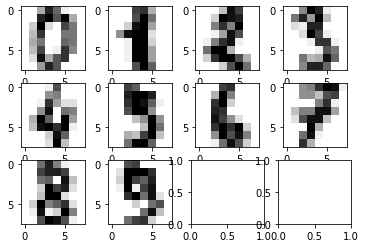

In [4]:
inverted_digits = X.apply(invert_digit)

rows_count = 3
cols_count = 4
total_number_to_display = 10

plot_digits(inverted_digits.values, rows_count, cols_count, total_number_to_display)

# 2. Кластеризация и оценка качества

Мы будем использовать два популярных алгоритма: иерархическую кластеризацию и метод $K$ средних ($K$-means clustering). Эти и другие алгоритмы кластеризации доступны в библиотеке scikit-learn в подмодуле `cluster`. Иерархическая кластеризация называется `AgglomerativeClustering`, а метод $K$ средних – `KMeans`.

Интерфейс у большинства алгоритмов в scikit-learn простой и единообразный:
- Чтобы инициализировать модель, нужно создать экземпляр соответствующего класса со всеми необходимыми параметрами. Например, у кластеризаций единственный обязательный параметр называется `n_clusters`, это количество кластеров, которое мы хотим получить на выходе.
- Инициализированную модель можно обучить, вызвав метод `fit`.
- С помощью обученной модели можно предсказывать, вызывая метод `predict`.

Как видно, этот интерфейс хорош только для задач обучения с учителем, в которых чётко разделены фазы обучения модели и предсказания с её помощью. У кластеризаций зато есть метод `fit_predict`, который разбивает входную выборку на кластеры и сразу же возвращает результаты разбиения.

**(0.5 балла)** Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [5]:
# AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=10)
predicted_labels_agglomerative_clustering = clustering.fit_predict(X)
print(predicted_labels_agglomerative_clustering)
print(predicted_labels_agglomerative_clustering.shape)

[7 9 4 ... 4 1 4]
(1797,)


In [6]:
# KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=100, random_state=0)
predicted_labels_kmeans = kmeans.fit_predict(X)
print(predicted_labels_kmeans)
print(predicted_labels_kmeans.shape)
print(kmeans.cluster_centers_.shape)

[8 6 6 ... 6 7 7]
(1797,)
(10, 64)


**(1 балл)** Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- Центр кластера – это среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Чтобы выбрать наблюдения, входящие в кластер номер `i`, используйте индексацию по булевозначной маске. Саму маску можно получить из массива предсказанных номеров кластеров и числа `i` оператором `==`.
- Усреднять NumPy-массив вдоль какой-нибудь из осей умеет функция `np.mean`. Ознакомьтесь со справкой к ней. Нам нужно усреднение по строкам.

In [7]:
def find_centers(X, predicted_labels):
    """
    X - 2-dimensional array
    """
    # собрать все наблюдения, входящие в кластер
    clustered_X = []
    for i in range(10):
        clustered_X.append([])
    
    for i in range(predicted_labels.shape[0]):
        cluster_number = predicted_labels[i]
        clustered_X[cluster_number].append(X[i].tolist())

    # усредним данные по каждому кластеру
    mean_clustered_X = []
    for i in range(10):
        mean_clustered_X.append([])
    
    for i in range(10):
        mean_clustered_X[i] = np.mean(clustered_X[i], axis=0)
        
    return mean_clustered_X

<Figure size 432x288 with 0 Axes>

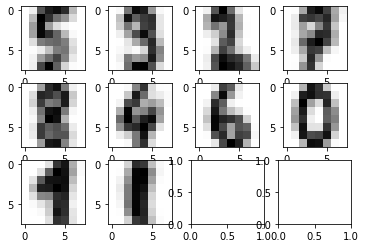

In [8]:
# AgglomerativeClustering

mean_clustered_X = find_centers(X.values, predicted_labels_agglomerative_clustering)
inverted_mean_clustered_X = invert_digit(mean_clustered_X)
plot_digits(inverted_mean_clustered_X, rows_count, cols_count, total_number_to_display)

<Figure size 432x288 with 0 Axes>

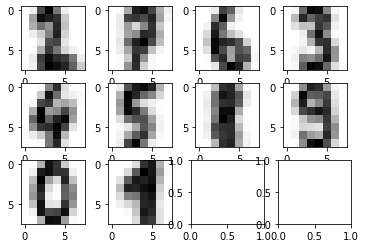

In [9]:
# KMeans

inverted_cluster_centers_kmeans = invert_digit(kmeans.cluster_centers_)

plot_digits(inverted_cluster_centers_kmeans, rows_count, cols_count, total_number_to_display)

В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.

**(1.5 балла)** Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

In [10]:
from sklearn.metrics import silhouette_score

# AgglomerativeClustering

K_range = range(2, 21)
silhouette_scores_1 = []
for n_clusters in K_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(X)
    silhouette_scores_1.append(silhouette_score(X, labels))

In [11]:
# KMeans

silhouette_scores_2 = []
for n_clusters in K_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_scores_2.append(silhouette_score(X, labels))

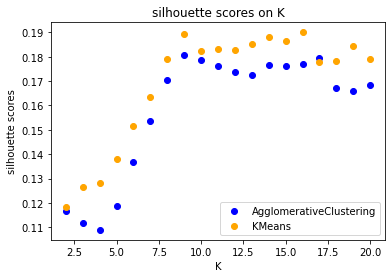

In [12]:
# Visualize

plt.scatter(K_range, silhouette_scores_1, label="AgglomerativeClustering", color="blue")
plt.scatter(K_range, silhouette_scores_2, label="KMeans", color="orange")

plt.xlabel('K')
plt.ylabel('silhouette scores')
plt.title('silhouette scores on K')
plt.legend(loc='lower right')
plt.show()

In [13]:
"""
При каком числе кластеров достигается максимум силуэта?

Максимум силуэта достигатся при количестве кластеров, близком к 10.
"""

'\nПри каком числе кластеров достигается максимум силуэта?\n\nМаксимум силуэта достигатся при количестве кластеров, близком к 10.\n'

Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

**(1 балл)** Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

In [14]:
from sklearn.metrics import v_measure_score

# AgglomerativeClustering

v_measure_score_1 = []
for n_clusters in K_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels_pred = clustering.fit_predict(X)
    v_measure_score_1.append(v_measure_score(y, labels_pred))

In [15]:
# KMeans

v_measure_score_2 = []
for n_clusters in K_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=0)
    labels_pred = kmeans.fit_predict(X)
    v_measure_score_2.append(v_measure_score(y, labels_pred))

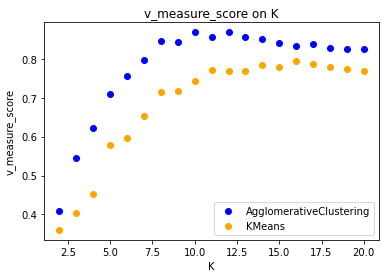

In [16]:
# Visualize

plt.scatter(K_range, v_measure_score_1, label="AgglomerativeClustering", color="blue")
plt.scatter(K_range, v_measure_score_2, label="KMeans", color="orange")

plt.xlabel('K')
plt.ylabel('v_measure_score')
plt.title('v_measure_score on K')
plt.legend(loc='lower right')
plt.show()

In [17]:
"""
При каком числе кластеров достигается максимум  𝑉 -меры?

Максимум 𝑉 -меры достигатся при количестве кластеров, близком к 10.

"""

'\nПри каком числе кластеров достигается максимум  𝑉 -меры?\n\nМаксимум 𝑉 -меры достигатся при количестве кластеров, близком к 10.\n\n'

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

<u>Замечание:</u> Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

**(1.5 балла)** Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [18]:
from sklearn.decomposition import TruncatedSVD
n_clusters = 10
n_features = [2, 5, 10, 20]


silhouette_scores_1 = []
silhouette_scores_2 = []

v_measure_score_1 = []
v_measure_score_2 = []

for n_components in n_features:
    svd_transformer = TruncatedSVD(n_components = n_components)
    transformed_X = svd_transformer.fit_transform(X)
    
    # AgglomerativeClustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(transformed_X)
    silhouette_scores_1.append(silhouette_score(transformed_X, labels))    
    v_measure_score_1.append(v_measure_score(y, labels))
    
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=0)
    labels = kmeans.fit_predict(transformed_X)
    silhouette_scores_2.append(silhouette_score(transformed_X, labels))
    v_measure_score_2.append(v_measure_score(y, labels))   
    

In [19]:
# AgglomerativeClustering

# Metrics on original data
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X)
silhouette_scores_1_original = silhouette_score(X, labels)   
v_measure_score_1_original = v_measure_score(y, labels)

print(f'Metrics on original data: silhouette {silhouette_scores_1_original}, v_measure: {v_measure_score_1_original}')
print(f'silhouette for truncated data: {silhouette_scores_1}')
print(f'v_measure for truncated data: {v_measure_score_1}')

Metrics on original data: silhouette 0.17849659940596496, v_measure: 0.8681701126909083
silhouette for truncated data: [0.2808169900524272, 0.27274153631428805, 0.250710574602227, 0.19566234827356524]
v_measure for truncated data: [0.3337189903948925, 0.6756036446423491, 0.8259753348813222, 0.8171311050922185]


In [20]:
# KMeans

# Metrics on original data
kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=0)
labels = kmeans.fit_predict(X)
silhouette_scores_2_original = silhouette_score(X, labels)   
v_measure_score_2_original = v_measure_score(y, labels)

print(f'Metrics on original data: silhouette {silhouette_scores_2_original}, v_measure {v_measure_score_2_original}')
print(f'silhouette for truncated data: {silhouette_scores_2}')
print(f'v_measure for truncated data: {v_measure_score_2}')

Metrics on original data: silhouette 0.18249230158805416, v_measure 0.743687819256497
silhouette for truncated data: [0.3491935981741912, 0.3123376156842573, 0.2631327998404853, 0.21278937901712158]
v_measure for truncated data: [0.34622999164757756, 0.6339843180848355, 0.7209435227027644, 0.7422729794392336]


In [21]:
"""
Удалось ли при каком-нибудь  𝑑′  получить силуэт и / или  𝑉 -меру лучше, чем на исходных данных?

AgglomerativeClustering:
Силуэт оказался лучше на всех 𝑑′.
𝑉 -меру оказалась хуже на всех 𝑑′.

KMeans
Силуэт оказался лучше на всех 𝑑′.
𝑉 -меру оказалась хуже на всех 𝑑′.
"""

'\nУдалось ли при каком-нибудь  𝑑′  получить силуэт и / или  𝑉 -меру лучше, чем на исходных данных?\n\nAgglomerativeClustering:\nСилуэт оказался лучше на всех 𝑑′.\n𝑉 -меру оказалась хуже на всех 𝑑′.\n\nKMeans\nСилуэт оказался лучше на всех 𝑑′.\n𝑉 -меру оказалась хуже на всех 𝑑′.\n'

Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.

<u>Замечание:</u> В последние годы вместо tSNE на практике часто используется [UMAP](https://github.com/lmcinnes/umap), более быстрый алгоритм с похожими свойствами. В этой лабораторной работе не предлагается использовать UMAP, так как это потребовало бы установить ещё одну зависимость -- библиотеку `umap-learn`. Желающие могут проделать задания на tSNE с использованием UMAP; в этом случае обратите внимание на параметры `n_neighbors` и `min_dist`, которыми определяется вид проекции.

**(0.5 балла)** Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

In [22]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components = 2)
transformed_X = tsne_transformer.fit_transform(X)

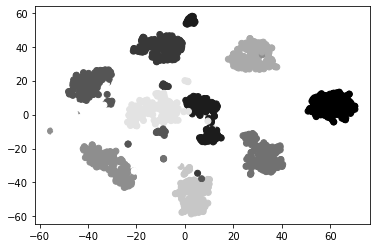

In [23]:
# Visualize

plt.scatter(transformed_X[:,0], transformed_X[:,1], label="AgglomerativeClustering", c=y)

plt.show()

**(1 балл)** Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [24]:
# AgglomerativeClustering

# Metrics on original data
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X)
silhouette_scores_original = silhouette_score(X, labels)   
v_measure_score_original = v_measure_score(y, labels)

labels_transformed = clustering.fit_predict(transformed_X)
silhouette_scores_transformed = silhouette_score(transformed_X, labels_transformed)   
v_measure_score_transformed = v_measure_score(y, labels_transformed)

print(f'Metrics on original data: silhouette {silhouette_scores_original}, v_measure {v_measure_score_original}')
print(f'Metrics on transformed data: silhouette {silhouette_scores_transformed}, v_measure {v_measure_score_transformed}')

Metrics on original data: silhouette 0.17849659940596496, v_measure 0.8681701126909083
Metrics on transformed data: silhouette 0.6290019154548645, v_measure 0.909384579346888


In [25]:
"""
Удалось ли получить силуэт и / или  𝑉 -меру лучше, чем на исходных данных?

Да, на трансформированных данных силуэт и 𝑉 -мера оказались лучше.
"""

'\nУдалось ли получить силуэт и / или  𝑉 -меру лучше, чем на исходных данных?\n\nДа, на трансформированных данных силуэт и 𝑉 -мера оказались лучше.\n'

In [26]:
# KMeans

# Metrics on original data
kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=0)
labels = kmeans.fit_predict(X)
silhouette_scores_original = silhouette_score(X, labels)   
v_measure_score_original = v_measure_score(y, labels)

labels_transformed = kmeans.fit_predict(transformed_X)
silhouette_scores_transformed = silhouette_score(transformed_X, labels_transformed)   
v_measure_score_transformed = v_measure_score(y, labels_transformed)

print(f'Metrics on original data: silhouette {silhouette_scores_original}, v_measure {v_measure_score_original}')
print(f'Metrics on transformed data: silhouette {silhouette_scores_transformed}, v_measure {v_measure_score_transformed}')


Metrics on original data: silhouette 0.18249230158805416, v_measure 0.743687819256497
Metrics on transformed data: silhouette 0.6283300518989563, v_measure 0.9065865765036168


In [27]:
"""
Удалось ли получить силуэт и / или  𝑉 -меру лучше, чем на исходных данных?

Да, на трансформированных данных силуэт и 𝑉 -мера оказались лучше.

"""

'\nУдалось ли получить силуэт и / или  𝑉 -меру лучше, чем на исходных данных?\n\nДа, на трансформированных данных силуэт и 𝑉 -мера оказались лучше.\n\n'

**(0.5 балла)** Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

<Figure size 432x288 with 0 Axes>

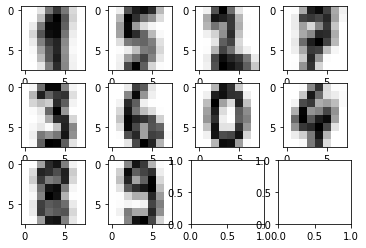

In [28]:
"""
Самым лучшим оказалось разбиение AgglomerativeClustering с использованием TSNE трансформации
"""

tsne_transformer = TSNE(n_components = 2)
transformed_X = tsne_transformer.fit_transform(X)

clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(transformed_X)

mean_clustered_X = find_centers(X.values, labels)
inverted_mean_clustered_X = invert_digit(mean_clustered_X)
plot_digits(inverted_mean_clustered_X, rows_count, cols_count, total_number_to_display)

In [29]:
"""
 Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?
 
 Да, удалось
 
"""

'\n Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?\n \n Да, удалось\n \n'

# 4. Итоги, бонус

**(1 балл)** Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

In [30]:
"""
Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм  𝐾  средних? 
Алгоритмы дают приблизительно одинаковый результат с точки зрения качества.
Кажется, что иерархическая кластеризация дает немного лучший результат за более короткое время.

Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
Качество алгоритма 𝐾 средних зависит от количества числа запусков.
Также алгоритма 𝐾 средних может дать лучший результат, если использовать силуэт в качестве критерии оценки качества.

Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?
TruncatedSVD алгоритм не позволил улучшить результат, а применение алгоритма TSNE позволило значительно улучшить значения метрик.

"""

'\nКакой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм  𝐾  средних? \nАлгоритмы дают приблизительно одинаковый результат с точки зрения качества.\nКажется, что иерархическая кластеризация дает немного лучший результат за более короткое время.\n\nЗависит ли это от настроек каждого алгоритма? От критериев оценивания качества?\nКачество алгоритма 𝐾 средних зависит от количества числа запусков.\nТакже алгоритма 𝐾 средних может дать лучший результат, если использовать силуэт в качестве критерии оценки качества.\n\nУдаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?\nTruncatedSVD алгоритм не позволил улучшить результат, а применение алгоритма TSNE позволило значительно улучшить значения метрик.\n\n'

**(Бонусные 2 балла)** Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](https://stackoverflow.com/a/60450028). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.